Accuracy: 0.9473684210526315
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



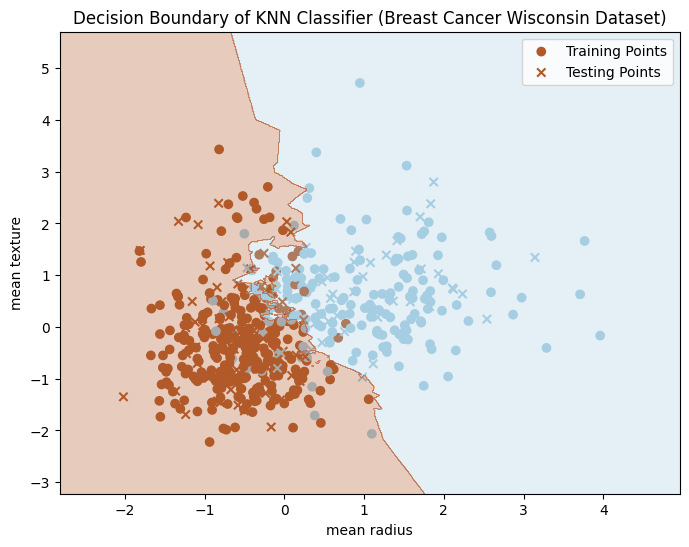

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer Wisconsin dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the KNN classifier
k = 5  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision boundary (for 2 features only)
feature1_index = 0  # Index of the first feature to visualize
feature2_index = 1  # Index of the second feature to visualize

X_train_subset = X_train[:, [feature1_index, feature2_index]]
X_test_subset = X_test[:, [feature1_index, feature2_index]]

model.fit(X_train_subset, y_train)

# Plot decision boundary
plt.figure(figsize=(8, 6))

# Plot training points
plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_train, cmap=plt.cm.Paired, label='Training Points')

# Plot testing points
plt.scatter(X_test_subset[:, 0], X_test_subset[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', label='Testing Points')

# Plot decision boundary
x_min, x_max = X_train_subset[:, 0].min() - 1, X_train_subset[:, 0].max() + 1
y_min, y_max = X_train_subset[:, 1].min() - 1, X_train_subset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

plt.xlabel(cancer.feature_names[feature1_index])
plt.ylabel(cancer.feature_names[feature2_index])
plt.title('Decision Boundary of KNN Classifier (Breast Cancer Wisconsin Dataset)')
plt.legend()
plt.show()
